In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.sparse.linalg import svds

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from RS_Xiao_Functions import *

### Part (a): Use any method of your choice to predict preference scores of each user.
    Different methods including collaborative filtering (with Pearson distance and Euclidean distance), and low-rank matrix factorization are used to acquire the prediction and compared. 
    
    ***Note***: All predicted ratings are bounded between 1-5 and rounded to integers, in accordance with original ratings.
    
#### - Method A: Collaborative filtering
        
##### A1: Pearson distance.

In [2]:
rs_cf(sim_pearson)

user: 1
user: 101
user: 201
user: 301
user: 401
max mse: 16.0 max person: 13 max item 263
MSE of first set: 1.0047
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
max mse: 16.0 max person: 9 max item 690
MSE of second set: 0.9872
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
user: 701
user: 801
max mse: 16.0 max person: 97 max item 83
MSE of third set: 0.986
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
user: 701
user: 801
user: 901
max mse: 16.0 max person: 148 max item 191
MSE of fourth set: 0.97565
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
user: 701
user: 801
user: 901
max mse: 16.0 max person: 90 max item 69
MSE of fifth set: 0.97165
RMSE of 5-fold CV by Collaborative Filtering with Pearson distance: 0.9924918135682531


#### <font color=red> The root mean square error based on 5 fold cross-validation by Pearson-based distance Collaborative Filtering is __~0.9925__</font>

#### - Method A: Collaborative filtering
    
##### A2: Euclidean distance.

In [3]:
rs_cf(sim_distance)

user: 1
user: 101
user: 201
user: 301
user: 401
max mse: 16.0 max person: 14 max item 176
MSE of first set: 1.0335
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
max mse: 16.0 max person: 9 max item 690
MSE of second set: 1.01325
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
user: 701
user: 801
max mse: 16.0 max person: 97 max item 83
MSE of third set: 1.0043
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
user: 701
user: 801
user: 901
max mse: 16.0 max person: 148 max item 191
MSE of fourth set: 1.0046
user: 1
user: 101
user: 201
user: 301
user: 401
user: 501
user: 601
user: 701
user: 801
user: 901
max mse: 16.0 max person: 148 max item 127
MSE of fifth set: 0.99435
RMSE of 5-fold CV by Collaborative Filtering with Pearson distance: 1.004987562112089


#### <font color=red> The root mean square error based on 5 fold cross-validation by Euclidean-based distance Collaborative Filtering is __~1.0050__. </font>
#### <font color=red> It shows that Collaborative Filtering with Pearson-based distance gives better prediction. </font>

#### - Method B: Low-Rank Matrix Factorization
    
    Next, we instead try Low-Rank Matrix Factorization for prediction, compared to the results of collaborative filtering.

In [5]:
train_names = ['u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base']
test_names = ['u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test']
mse_lrmf = 0
for i in range(5):
    trainfile = train_names[i]
    testfile = test_names[i]
    train, test, test_org = pd_read(trainfile, testfile)
    mse_lrmf += RMRM(i, train, test, test_org, n_compo=15, random_s=42, max_iteration=1)
rmse_lrmf = np.sqrt(mse_lrmf/5)

print('RMSE of 5-fold CV by Low-Rank Matrix Factorization:', rmse_lrmf)

MSE of 1 set: 1.06295
MSE of 2 set: 1.0474
MSE of 3 set: 1.03305
MSE of 4 set: 1.02995
MSE of 5 set: 1.04615
RMSE of 5-fold CV by Low-Rank Matrix Factorization: 1.0217142457654196


#### <font color=red> The root mean square error based on 5 fold cross-validation by Low-rank Matrix Factorization is __~1.0217__. </font>

### <font color=red> In summary, the Pearson-based distance Collaborative Filtering gives best prediction which is ~0.9925. </font>

### Part (b): Do you have any evidence to suggest that missing does not occur at random?

#### - Heatmap
    
    First we take a look at ratings/missing ratings by users*movies. Black represents missing values. The lighter dot is, the greater rating the user gives to the movie. Some rows are almost all black, which means some users rates few movies. Some rows are all colorful which means some users rate movies frequently. Similarly, by taking a look at columns we can find that some movies are rated by a lot of users whereas some are rated by only a few. We can conclude that the missing does not occur at random. Users have preference in rating or not while some movies tend to attract more users to rate. 

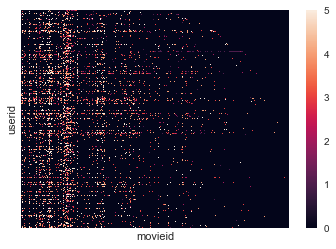

,userid,movieid,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [7]:
heatmap('u.data')

#### - Histogram
    
    - The first figure shows a histogram of user's number of ratings. The figure is right-skewed, which means that only a few of users rate a lot and most users don't rate many movies.
    
    - The second figure shows a scatterplot of items' number of ratings versus mean rating of each item. It shows that items with higher mean ratings tend to attact more users to rate.
    
    - Figures below both show that the missing values are not at random from both user and item perspectives.

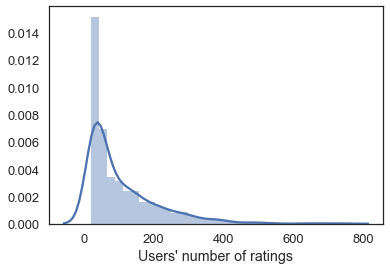

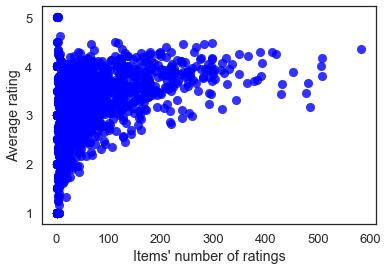

In [13]:
r_cols = ['userid', 'movieid', 'rating', 'unix_timestamp']
train = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')
grp = train.groupby(['userid'])
grp = grp.count()
sns.distplot(grp.rating, axlabel="Users' number of ratings")
plt.show()

grp_mv = train.groupby(['movieid'])
grp_mv_ct = grp_mv.count()
grp_mv_mn = grp_mv.mean()
ax = sns.regplot(x=grp_mv_ct.userid, y=grp_mv_mn.rating, color="b", fit_reg=False)
plt.xlabel("Items' number of ratings")
plt.ylabel("Average rating")
plt.show()


#### - Movie genres breakdown

    - We breakdown the rating data by movie genres. The first figure shows the number of ratings by different movie genres. It shows that movies with genres of action, comedy, drama, romance and thriller tend to attract more ratings. 
    
    - The second figure below shows the rating breakdown of each of the five genres. The x-axis is the rating 1-5. We find that the rating patterns of each genre are quite similar - most are rated with 4 and least with 1.
    
    - The figures also give the evidence that by different movie genres, the missing pattern is not at random. 

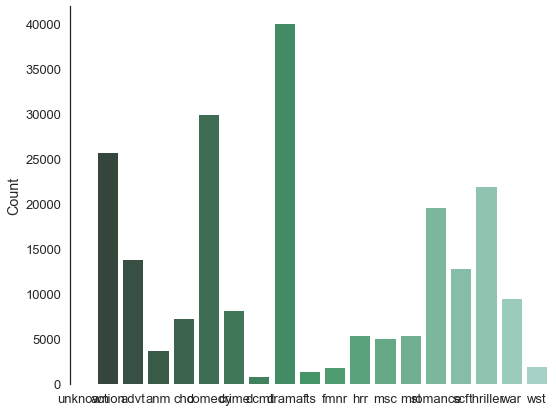

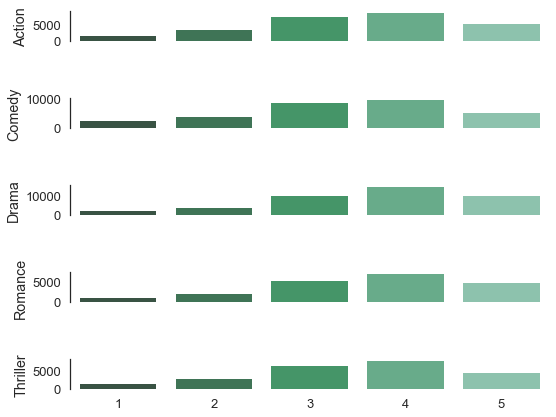

In [8]:
movie_bd('u.data')

### Part (c): demonstrate that the predictive performance can be enhanced by incorporating the missing pattern
    
#### - Iterations

    We first put 0s to missing values with the construction of rating matrix. After prediction by matrix factorization, in next steps, predicted values are put into the original rating matrix together with the original ratings from training data. In that case, missing patterns are incorporated into the rating matrix in iterations and the prediction is improved as a result.

In [9]:
train_names = ['u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base']
test_names = ['u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test']
mse_rmrm = 0
for i in range(5):
    trainfile = train_names[i]
    testfile = test_names[i]
    train, test, test_org = pd_read(trainfile, testfile)
    mse_rmrm += RMRM(i, train, test, test_org, n_compo=15, random_s=42, max_iteration=10)
rmse_rmrm = np.sqrt(mse_rmrm/5)
print('RMSE of 5-fold CV by repeated matrix reconstruction method:', rmse_rmrm)

MSE of 1 set: 1.03625
MSE of 2 set: 1.03515
MSE of 3 set: 1.00935
MSE of 4 set: 1.00795
MSE of 5 set: 1.0202
RMSE of 5-fold CV by repeated matrix reconstruction method: 1.0108313410257914


#### <font color=red> By incorporating the missing pattern, the root mean square error reduces from ~1.0217 to ~1.0108. Therefore, the prediction has improved.</font>

In summary, because the missing values are not at random. If we directly predict the result based on the original data, the information carried by missing pattern is ignored. Therefore, by incorporating the missing pattern in the prediction can improve the final result.